## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. Постройте графики синуса и косинуса на одном рисунке, задайте им разные цвета и стили линий, отобразите решетку. Задайте надписи к осям. Отобразите легенду.

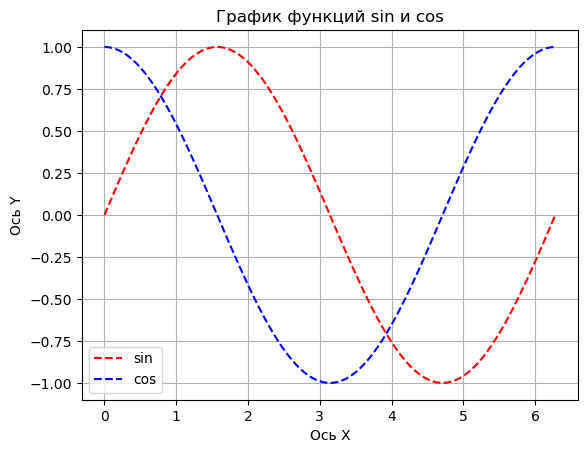

In [2]:
x = np.linspace(0, 2*np.pi, 100)
y_s = np.sin(x)
y_c = np.cos(x)

plt.title('График функций sin и cos')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.plot(x, y_s, 'r--', label='sin')
plt.plot(x, y_c, 'b--', label='cos')
plt.legend()
plt.grid()

2. Постройте кривые синуса и косинуса на двух рядом стоящих графиках, задайте им разные цвета и стили линий. Постройте те же кривые на двух графиках друг над другом.

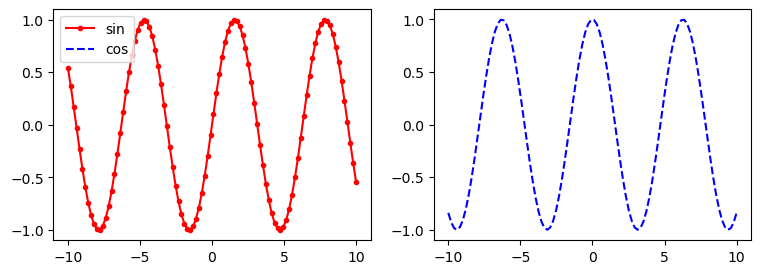

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 3))
x = np.linspace(-10, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

line1, = axes[0].plot(x, y1, 'r.-', label='sin')
line2, = axes[1].plot(x, y2, 'b--', label='cos')
axes[0].legend(handles=[line1, line2])

plt.show()

3. При помощи пакета pandas_datareader загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [4]:
pip install --upgrade pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [6]:
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance as yf

In [7]:
yf.pdr_override()
start = '2017-01-01'
end = '2018-12-31'
symbols = ['AAPL']

data = pdr.get_data_yahoo(symbols, start, end)

data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,26.989265,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,26.959064,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.096157,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.398232,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.649189,134247600


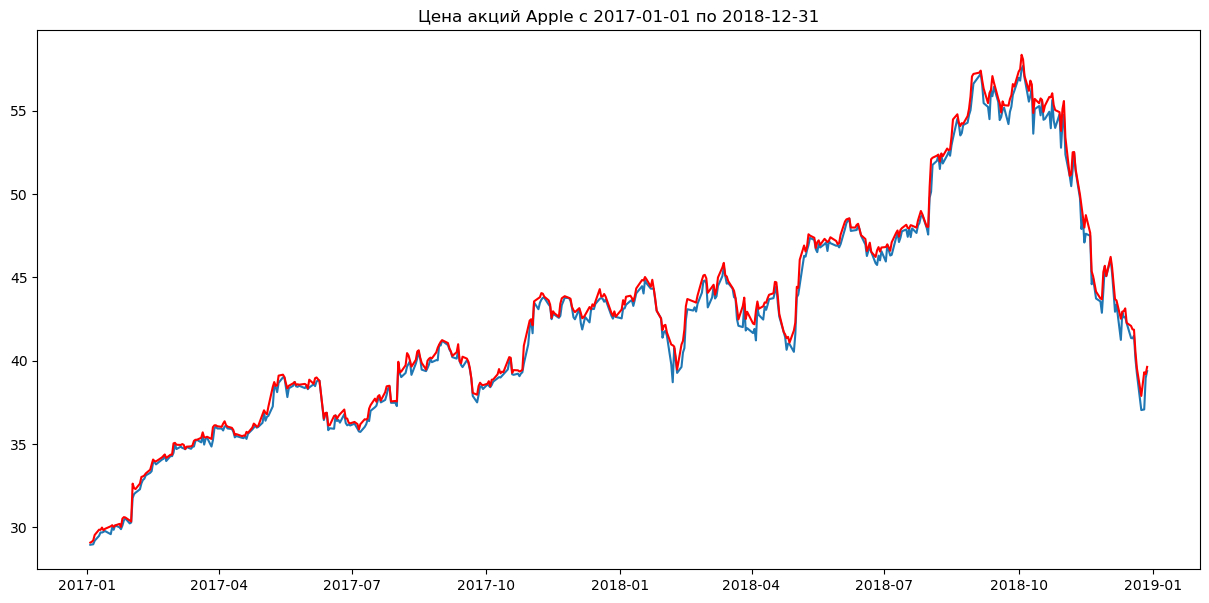

In [8]:
plt.figure(figsize = (15, 7))
plt.title(f'Цена акций Apple с {start} по {end}')
plt.plot(data['Open'])
plt.plot(data['High'], 'r')
plt.show()

4. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

In [9]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


<Axes: >

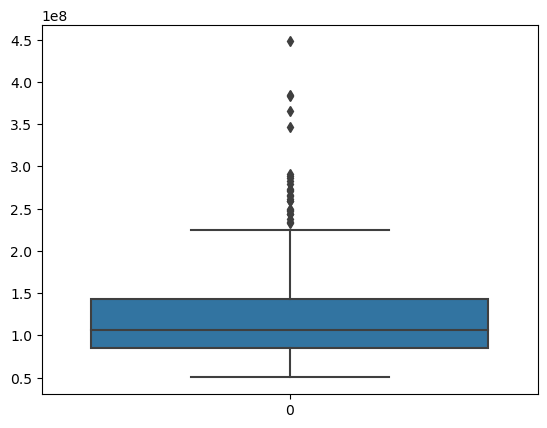

In [10]:
import seaborn as sns
sns.boxplot(data=data['Volume'])


## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов.

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день.

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

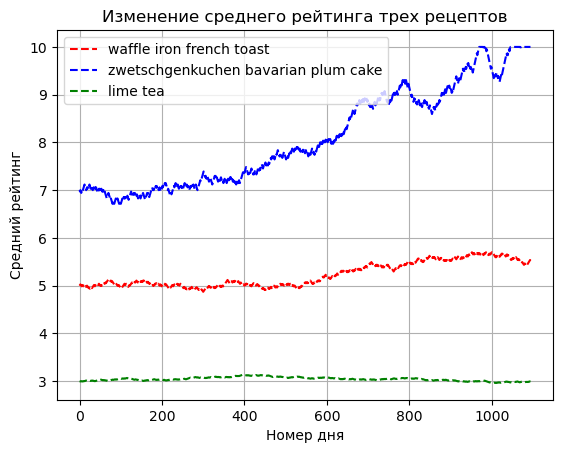

In [11]:
data = np.load('average_ratings.npy')
x = range(len(data[0]))
y1, y2, y3 = data[0], data[1], data[2]

plt.plot(x, y1, '--r')
plt.plot(x, y2, '--b')
plt.plot(x, y3, '--g')

plt.title('Изменение среднего рейтинга трех рецептов')
plt.xlabel('Номер дня')
plt.ylabel('Средний рейтинг')
plt.legend(['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea'], loc=2)
plt.grid()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


Text(0.5, 0.98, 'Изменение среднего рейтинга трех рецептов')

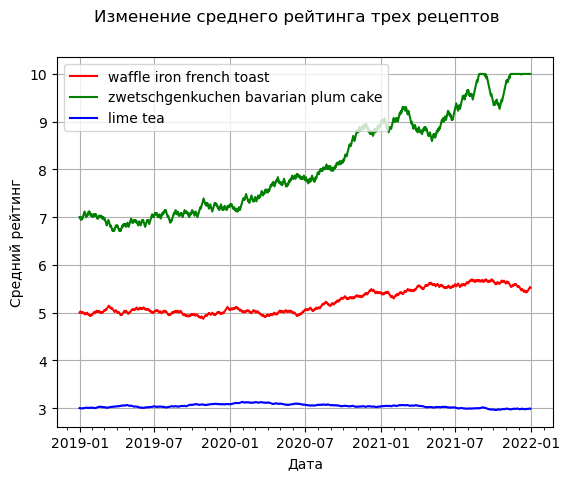

In [12]:
import matplotlib.cbook as cbook
import matplotlib.dates as mdates

data = np.load('average_ratings.npy')

fig, axes = plt.subplots()

x = pd.date_range(start='1/1/2019', end='30/12/2021')
y1, y2, y3 = data[0], data[1], data[2]


l1, = axes.plot(x, y1, 'r', label = 'waffle iron french toast')
l2, = axes.plot(x, y2, 'g', label = 'zwetschgenkuchen bavarian plum cake')
l3, = axes.plot(x, y3, 'b', label = 'lime tea')

axes.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
axes.xaxis.set_minor_locator(mdates.MonthLocator())
axes.grid(True)


plt.xlabel('Дата')
plt.ylabel('Средний рейтинг')

axes.legend(handles=[l1, l2, l3], loc=2)
fig.suptitle("Изменение среднего рейтинга трех рецептов")


3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2.

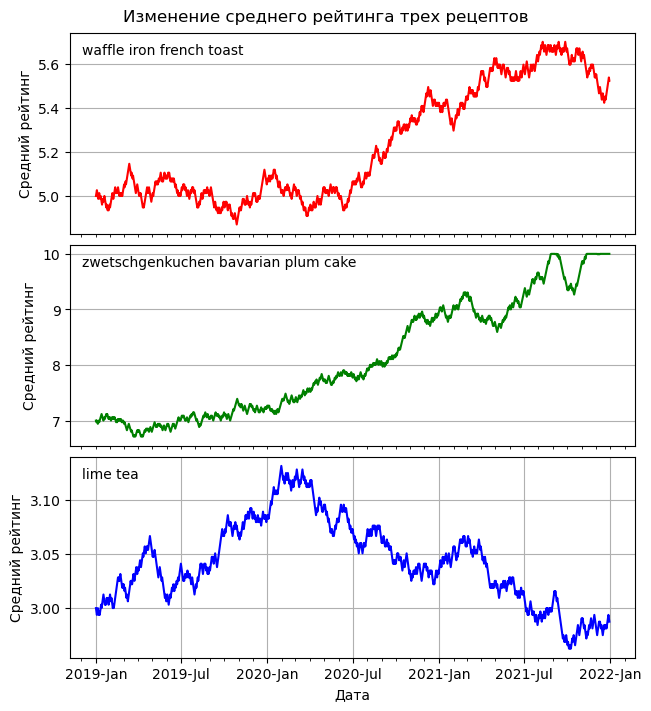

In [13]:
import matplotlib.pyplot as plt

import matplotlib.cbook as cbook
import matplotlib.dates as mdates


data = np.load('average_ratings.npy')
x = pd.date_range(start='1/1/2019', end='30/12/2021')

fig, axs = plt.subplots(3, 1, figsize=(6.4, 7), layout='constrained')
# common to all three:
k = 0
colors = ['r', 'g', 'b']
for ax in axs:
    ax.plot(x, data[k], colors[k], data=data[k])
    # Major ticks every half year, minor ticks every month   ,mdates.MonthLocator(bymonth=(1, 7))
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.grid(True)
    ax.set_ylabel('Средний рейтинг')
    
    k += 1


axs[0].set_title('waffle iron french toast', loc='left', y=0.85, x=0.02, fontsize='medium')
axs[1].set_title('zwetschgenkuchen bavarian plum cake', loc='left', y=0.85, x=0.02, fontsize='medium')
axs[2].set_title('lime tea', loc='left', y=0.85, x=0.02, fontsize='medium')
axs[0].axes.xaxis.set_ticks([])
axs[1].axes.xaxis.set_ticks([])

axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))



fig.suptitle("Изменение среднего рейтинга трех рецептов")
plt.xlabel('Дата')
plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [14]:
pip install latex

Note: you may need to restart the kernel to use updated packages.


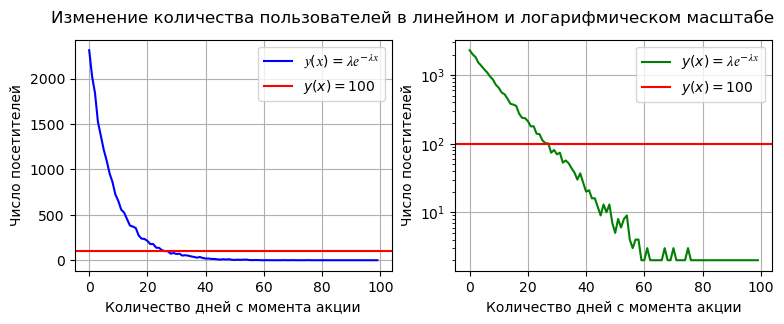

In [15]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)


data = np.load('visitors.npy')


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 3))

x = range(100)
y = data
y1_line, = axes[0].plot(x, y, 'b', label = r'$𝑦(𝑥)=𝜆𝑒^{−𝜆𝑥}$')
y2_line, = axes[1].plot(x, y, 'g', label = r'$y(x)=𝜆𝑒^{−𝜆𝑥}$')


y3_line = axes[0].axhline(y = 100, color = 'r', linestyle = '-', label = r'$y(x)=100$') 
axes[1].axhline(y = 100, color = 'r', linestyle = '-') 

axes[0].set_xlabel('Количество дней с момента акции')
axes[0].set_ylabel('Число посетителей')
axes[1].set_xlabel('Количество дней с момента акции')
axes[1].set_ylabel('Число посетителей')

axes[0].grid(True)
axes[1].grid(True)

#axes[0].set_title('𝑦(𝑥)=𝜆𝑒−𝜆𝑥')
#axes[1].set_title('𝑦(𝑥)=𝜆𝑒−𝜆𝑥')

axes[1].semilogy() 

axes[0].legend(handles=[y1_line, y3_line])
axes[1].legend(handles=[y2_line, y3_line])
fig.suptitle("Изменение количества пользователей в линейном и логарифмическом масштабе")
plt.show()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [16]:
reviews = pd.read_csv('reviews_sample.csv')
recipes = pd.read_csv('recipes_sample.csv')

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [17]:
group_1 = recipes[recipes['minutes'] < 5]
group_2 = recipes[(5 <= recipes['minutes']) & (recipes['minutes'] < 50)]
group_3 = recipes[50 <= recipes['minutes']]
steps_1, size_1 = group_1['n_steps'].mean(), len(group_1)
steps_2, size_2 = group_2['n_steps'].mean(), len(group_2)
steps_3, size_3 = group_3['n_steps'].mean(), len(group_3)

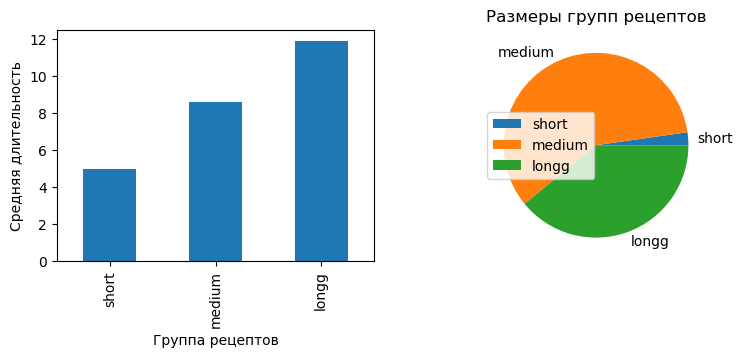

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 3))

df1 = pd.DataFrame({'names': ['1', '2', '3'],
                 'counts': [steps_1, steps_2, steps_3]}, index = ['short', 'medium', 'longg'])
df2 = pd.DataFrame([size_1, size_2, size_3], ['short', 'medium', 'longg'])
# bar
df1.plot(kind='bar', ax=axes[0], legend='')
axes[0].set_xlabel('Группа рецептов')
axes[0].set_ylabel('Средняя длительность')

# pie
df2.plot(kind='pie', ax=axes[1], subplots=True, ylabel="")
axes[1].set_title('Размеры групп рецептов')
plt.show()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

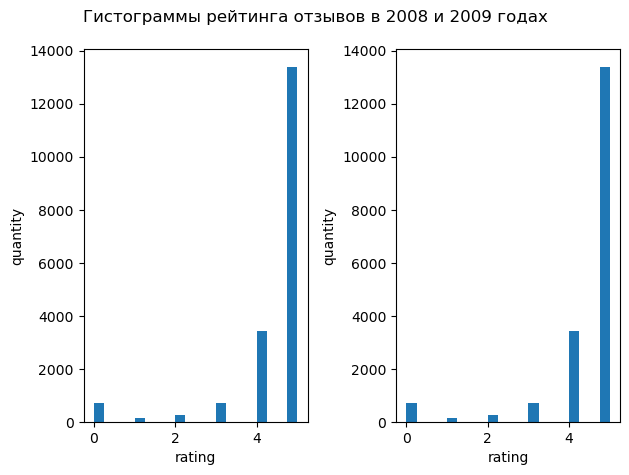

In [19]:
reviews2008 = reviews[('2008-01-01' <= reviews['date']) & (reviews['date'] < '2009-01-01')]
reviews2009 = reviews[('2009-01-01' <= reviews['date']) & (reviews['date'] < '2010-01-01')]
fig, axs = plt.subplots(1, 2, tight_layout=True, sharey='col')

N_points = 100000
n_bins = 20

reviews2008['rating'].plot.hist(ax=axs[0], bins=n_bins)
reviews2008['rating'].plot.hist(ax=axs[1], bins=n_bins)
axs[0].set_xlabel('rating')
axs[1].set_xlabel('rating')
axs[0].set_ylabel('quantity')
axs[1].set_ylabel('quantity')

plt.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')
plt.show()


### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5).

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

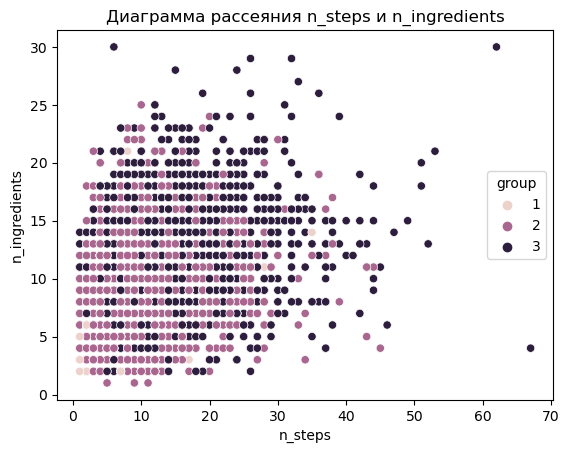

In [20]:
ser = []
grouped_recipes = recipes.copy()

for index, row in grouped_recipes.iterrows():
    if row.loc["minutes"] < 5:
        ser.append(1)
    elif (5 <= row.loc["minutes"]) & (row.loc["minutes"] < 50):
        ser.append(2)
    else:
        ser.append(3)
        
grouped_recipes['group'] = pd.Series(ser)

sns.scatterplot(data=grouped_recipes, x="n_steps", y="n_ingredients", hue='group')
plt.title("Диаграмма рассеяния n_steps и n_ingredients")
plt.show()

Когда точки диаграммы рассеяния разбросаны случайным образом, корреляция равна нулю или вообще отсутствует. Следовательно линейной зависимости между переменными n_steps и n_ingredients нет.

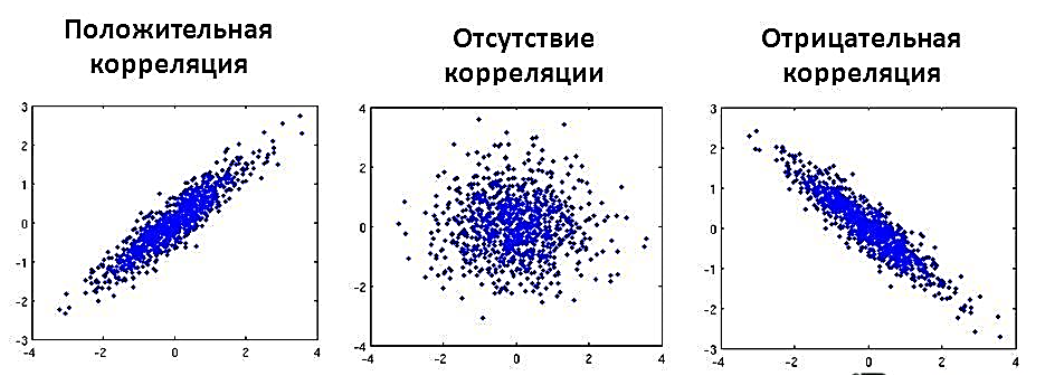

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap).

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`.

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

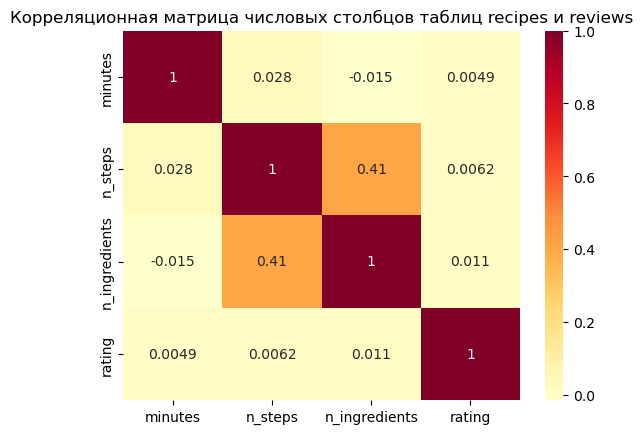

In [21]:
oew = pd.merge(recipes, reviews, left_index=True, right_index=True)
corr = oew[["minutes", "n_steps", "n_ingredients", "rating"]].corr()


sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap='YlOrRd')

plt.title("Корреляционная матрица числовых столбцов таблиц recipes и reviews")

plt.show()